In [1]:
import numpy as np, pandas as pd, seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from skimage.metrics import normalized_root_mse

In [65]:
df = pd.read_csv('Korea_PM2.5.csv')
df

,Measurement date,101,102,103,104,105,106,107,108,109,...,116,117,118,119,120,121,122,123,124,125
0,2017-01-01 00:00,57.0,63.0,68.0,46.0,44.0,62.0,40.0,63.0,50.0,...,65.0,63.0,45.0,46.0,49.0,57.0,39.0,48.0,51.0,53.0
1,2017-01-01 00:00,59.0,63.0,66.0,49.0,44.0,62.0,53.0,62.0,49.0,...,69.0,61.0,45.0,54.0,49.0,51.0,54.0,44.0,43.0,63.0
2,2017-01-01 00:00,59.0,57.0,65.0,41.0,43.0,63.0,48.0,62.0,44.0,...,56.0,60.0,42.0,54.0,47.0,50.0,58.0,44.0,36.0,56.0
3,2017-01-01 00:00,58.0,55.0,65.0,38.0,42.0,60.0,49.0,63.0,48.0,...,57.0,55.0,44.0,46.0,48.0,47.0,49.0,44.0,40.0,46.0
4,2017-01-01 00:00,61.0,54.0,61.0,39.0,35.0,61.0,38.0,59.0,56.0,...,48.0,49.0,42.0,42.0,45.0,48.0,43.0,40.0,38.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2017-02-13 19:00,19.0,18.0,13.0,11.0,10.0,9.0,15.0,9.0,14.0,...,17.0,13.0,19.0,15.0,19.0,17.0,16.0,15.0,16.0,17.0
26276,2017-02-13 19:00,19.0,19.0,12.0,11.0,10.0,11.0,15.0,12.0,14.0,...,18.0,12.0,19.0,14.0,21.0,20.0,14.0,16.0,22.0,19.0
26277,2017-02-13 19:00,18.0,20.0,14.0,14.0,12.0,12.0,15.0,9.0,8.0,...,18.0,12.0,18.0,13.0,18.0,17.0,14.0,14.0,15.0,17.0
26278,2017-02-13 19:00,19.0,17.0,15.0,13.0,15.0,15.0,17.0,8.0,11.0,...,17.0,10.0,28.0,14.0,21.0,18.0,13.0,15.0,15.0,18.0


In [66]:
dfc = df.iloc[:, 1:]
dfc.corr()

,101,102,103,104,105,106,107,108,109,110,...,116,117,118,119,120,121,122,123,124,125
101,1.000000,0.941168,0.904109,0.847771,0.795496,0.875022,0.868648,0.859962,0.898644,0.873856,...,0.848061,0.821105,0.896924,0.821568,0.899212,0.834097,0.856659,0.888249,0.830257,0.862052
102,0.941168,1.000000,0.935535,0.886996,0.836453,0.909217,0.891064,0.877312,0.925338,0.894481,...,0.881730,0.856986,0.927020,0.856227,0.932250,0.870913,0.887171,0.910471,0.848498,0.876714
103,0.904109,0.935535,1.000000,0.877185,0.823205,0.886482,0.895658,0.844614,0.913848,0.887178,...,0.867861,0.867454,0.904099,0.863859,0.919293,0.866343,0.893124,0.903232,0.835708,0.868209
104,0.847771,0.886996,0.877185,1.000000,0.847133,0.872231,0.855269,0.813172,0.868901,0.848886,...,0.829701,0.837969,0.858242,0.865072,0.857979,0.856035,0.856403,0.838330,0.801931,0.809824
105,0.795496,0.836453,0.823205,0.847133,1.000000,0.833748,0.836000,0.771010,0.815823,0.799583,...,0.840284,0.782979,0.809928,0.820147,0.810482,0.816010,0.803629,0.805461,0.799179,0.763167
106,0.875022,0.909217,0.886482,0.872231,0.833748,1.000000,0.879258,0.855267,0.879504,0.867783,...,0.866095,0.875378,0.896657,0.881048,0.891346,0.902334,0.895566,0.869982,0.824819,0.829386
107,0.868648,0.891064,0.895658,0.855269,0.836000,0.879258,1.000000,0.861521,0.891585,0.884778,...,0.841288,0.847989,0.871410,0.870137,0.888496,0.864132,0.884250,0.897700,0.881617,0.880999
108,0.859962,0.877312,0.844614,0.813172,0.771010,0.855267,0.861521,1.000000,0.847588,0.858622,...,0.805971,0.808087,0.849037,0.822128,0.858873,0.818261,0.856280,0.865738,0.846827,0.846161
109,0.898644,0.925338,0.913848,0.868901,0.815823,0.879504,0.891585,0.847588,1.000000,0.909007,...,0.852998,0.829291,0.886992,0.854803,0.897639,0.867600,0.856695,0.899832,0.840963,0.877429
110,0.873856,0.894481,0.887178,0.848886,0.799583,0.867783,0.884778,0.858622,0.909007,1.000000,...,0.818737,0.819356,0.859405,0.832404,0.878199,0.857340,0.845292,0.882876,0.840318,0.867089


In [67]:
storage = list(map(str, range(101,126)))
slr = LinearRegression()

for target in range(101, 126):

    pred = storage.copy()
    pred.remove(str(target))


    X = df.loc[:, pred].values
    y = df.loc[:, str(target)].values
    
    slr.fit(X, y)

    y_pred = np.array(slr.predict(X))
    print(f'rmse for {target}', mean_squared_error(y, y_pred, squared = False))
    print(f'nrmse for {target} {normalized_root_mse(np.array(y), y_pred)}')
    print(f'corr coef for {target} {np.corrcoef(np.array(y), y_pred)}')
    

rmse for 101 5.355916550614447
rmse for 102 3.7374636008285944
rmse for 103 5.487333969100211
rmse for 104 6.424526411700494
rmse for 105 8.410200984460278
rmse for 106 6.3225750284394895
rmse for 107 6.3026312507028255
rmse for 108 7.436387939129552
rmse for 109 5.581477711364728
rmse for 110 6.32241511785134
rmse for 111 7.150218948426894
rmse for 112 4.98725483561252
rmse for 113 6.316317184754852
rmse for 114 4.58747118292785
rmse for 115 5.124582148678358
rmse for 116 6.402752830151439
rmse for 117 7.191474762479359
rmse for 118 4.890722185522984
rmse for 119 7.229305235755769
rmse for 120 5.097498288352241
rmse for 121 6.844815663964176
rmse for 122 6.352170406224267
rmse for 123 6.4534130282597895
rmse for 124 7.377966900269182
rmse for 125 7.408217070097798


In [68]:
plt.scatter(y, slr.predict(X))
plt.plot(y, slr.predict(X), color='red', linewidth=2)

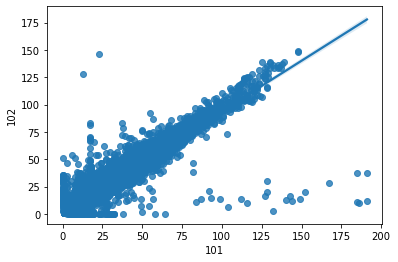

In [69]:
sns.regplot(x="101", y="102", data=df)